# Obiettivo


L’obiettivo del lavoro è analizzare il tema dell'Università e del lavoro.
- Capire cosa ne pensano i giovani sul tema "transizione università lavoro";
- Capire le difficoltà che ci sono per i giovani nel trovare lavoro, fare l'università.


L'analisi verrà svolta con tecniche di elaborazione naturale del linguaggio (NLP), in particolare tramite tecniche di Topic Modeling (BERTopic), che permetterà di estrarre le principali topic relative alle difficoltà che i giovani riscontrano nella transizione al lavoro durante e post-Università.

# Acquisizione ed Elaborazione dati

**Importo le librerie per l'elaborazione dati**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Carico il dataset**

In [ ]:
df = pd.read_excel("/content/gdrive/MyDrive/twitter_analysis/tweet_noRT.xlsx")

In [ ]:
df.head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count
0,197441639,jismysunshine,1700,57914,Cosa direbbe una stella ⭐️ di notte alle giraffe 🦒?!,fan account,Se riprendessi i temi delle elementari sicuramente rileggerei che avrei voluto sposarmi a 23 ann...,2022-10-09 21:44:54,0,0,2,0
1,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"📌10/10. Apertura #CareerWeek\n""#DSA e mondo del lavoro. #Recruiting e vita lavorativa delle pers...",2022-10-09 21:29:20,0,0,0,0
2,1323393328658944000,anxioustype_,107,3262,tra ansia e mal di pancia ☁️ mi piacciono le serie tv e i bubble tea🧋ho lasciato il cuore a Lond...,"London, England","università scozzese a 19 anni, master preso online + trasferimento a londra, tirocinio legato ag...",2022-10-09 21:27:05,0,1,0,0
3,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"📌11/10. #CareerWeek: stage DISPI multiplayer - Le imprese si presentano.\nH. 9.30, Complesso did...",2022-10-09 21:24:15,0,0,0,0
4,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"Career Week #Università di #Siena (10-13/10).\n&gt; 11 ottobre ore 16.30:\n""Adotta 1 skill!"" @US...",2022-10-09 21:14:52,0,0,0,0


**Controllo la dimensionalità del dataset**

In [ ]:
df.shape # (56393 righe x 12 colonne)

(22428, 12)

In [ ]:
df.columns

Index(['author_id', 'username', 'author_followers', 'author_tweets',
       'author_description', 'author_location', 'text', 'created_at',
       'retweets', 'replies', 'likes', 'quote_count'],
      dtype='object')

## Data Pre-processing

**Controllo Missing Value**

<Axes: >

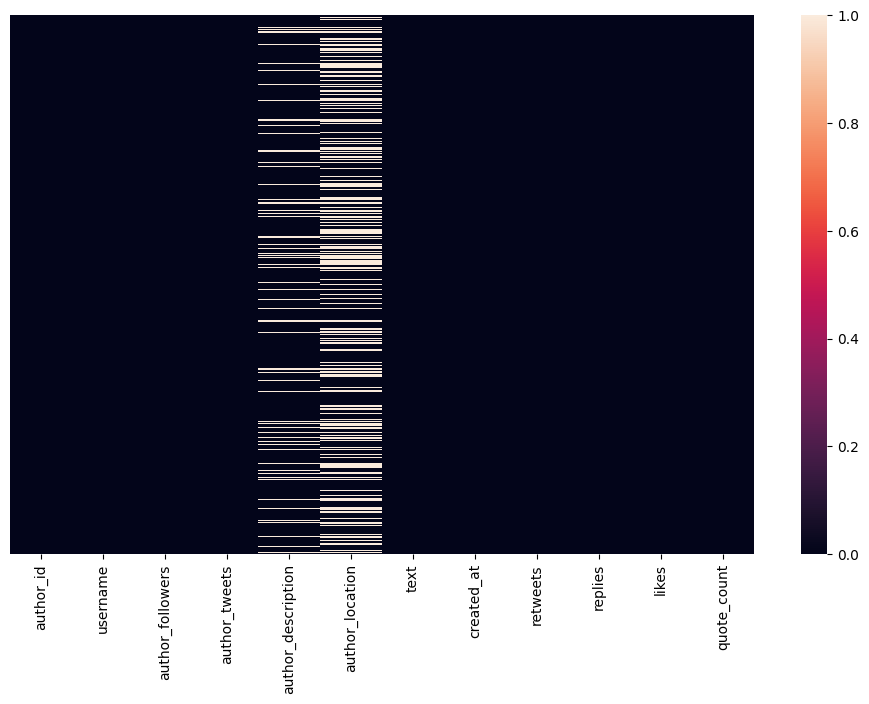

In [ ]:
plt.figure(figsize=(12,7)) #Controllo prima tramite visualizzazione
sns.heatmap(df.isnull(), yticklabels = False) # in bianco i dati mancanti

In [ ]:

df.isnull().sum() #Controllo il numero di dati mancanti per colonna

author_id                0
username                 0
author_followers         0
author_tweets            0
author_description    2604
author_location       7961
text                     0
created_at               0
retweets                 0
replies                  0
likes                    0
quote_count              0
dtype: int64

In [ ]:
df.dtypes #Tipo di dati

author_id                      int64
username                      object
author_followers               int64
author_tweets                  int64
author_description            object
author_location               object
text                          object
created_at            datetime64[ns]
retweets                       int64
replies                        int64
likes                          int64
quote_count                    int64
dtype: object

In [ ]:
df.head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count
0,197441639,jismysunshine,1700,57914,Cosa direbbe una stella ⭐️ di notte alle giraffe 🦒?!,fan account,Se riprendessi i temi delle elementari sicuramente rileggerei che avrei voluto sposarmi a 23 ann...,2022-10-09 21:44:54,0,0,2,0
1,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"📌10/10. Apertura #CareerWeek\n""#DSA e mondo del lavoro. #Recruiting e vita lavorativa delle pers...",2022-10-09 21:29:20,0,0,0,0
2,1323393328658944000,anxioustype_,107,3262,tra ansia e mal di pancia ☁️ mi piacciono le serie tv e i bubble tea🧋ho lasciato il cuore a Lond...,"London, England","università scozzese a 19 anni, master preso online + trasferimento a londra, tirocinio legato ag...",2022-10-09 21:27:05,0,1,0,0
3,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"📌11/10. #CareerWeek: stage DISPI multiplayer - Le imprese si presentano.\nH. 9.30, Complesso did...",2022-10-09 21:24:15,0,0,0,0
4,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"Career Week #Università di #Siena (10-13/10).\n&gt; 11 ottobre ore 16.30:\n""Adotta 1 skill!"" @US...",2022-10-09 21:14:52,0,0,0,0


In [ ]:
df = df.drop_duplicates(subset=['text'])

In [ ]:
df.shape

(22021, 12)

**Rimuovo Punti e simboli**

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
string_remove= '!"#$%&\()*+,-./:;<=>?@[\\]^_{|}~'

In [ ]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string_remove])
    text = re.sub('[0-9]+', '', text)
    return text

df['Tweet_punct'] = df['text'].apply(lambda x: remove_punct(x))
df.head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,Tweet_punct
0,197441639,jismysunshine,1700,57914,Cosa direbbe una stella ⭐️ di notte alle giraffe 🦒?!,fan account,Se riprendessi i temi delle elementari sicuramente rileggerei che avrei voluto sposarmi a 23 ann...,2022-10-09 21:44:54,0,0,2,0,Se riprendessi i temi delle elementari sicuramente rileggerei che avrei voluto sposarmi a anni…...
1,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"📌10/10. Apertura #CareerWeek\n""#DSA e mondo del lavoro. #Recruiting e vita lavorativa delle pers...",2022-10-09 21:29:20,0,0,0,0,📌 Apertura CareerWeek\nDSA e mondo del lavoro Recruiting e vita lavorativa delle persone con DSA...
2,1323393328658944000,anxioustype_,107,3262,tra ansia e mal di pancia ☁️ mi piacciono le serie tv e i bubble tea🧋ho lasciato il cuore a Lond...,"London, England","università scozzese a 19 anni, master preso online + trasferimento a londra, tirocinio legato ag...",2022-10-09 21:27:05,0,1,0,0,università scozzese a anni master preso online trasferimento a londra tirocinio legato agli st...
3,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"📌11/10. #CareerWeek: stage DISPI multiplayer - Le imprese si presentano.\nH. 9.30, Complesso did...",2022-10-09 21:24:15,0,0,0,0,📌 CareerWeek stage DISPI multiplayer Le imprese si presentano\nH Complesso didattico Mattioli ...
4,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"Career Week #Università di #Siena (10-13/10).\n&gt; 11 ottobre ore 16.30:\n""Adotta 1 skill!"" @US...",2022-10-09 21:14:52,0,0,0,0,Career Week Università di Siena \ngt ottobre ore \nAdotta skill USienaAlumni ti porta nel mond...


In [ ]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['Tweet_punct'].apply(lambda x: tokenization(x.lower()))
df.head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,Tweet_punct,Tweet_tokenized
0,197441639,jismysunshine,1700,57914,Cosa direbbe una stella ⭐️ di notte alle giraffe 🦒?!,fan account,Se riprendessi i temi delle elementari sicuramente rileggerei che avrei voluto sposarmi a 23 ann...,2022-10-09 21:44:54,0,0,2,0,Se riprendessi i temi delle elementari sicuramente rileggerei che avrei voluto sposarmi a anni…...,"[se, riprendessi, i, temi, delle, elementari, sicuramente, rileggerei, che, avrei, voluto, sposa..."
1,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"📌10/10. Apertura #CareerWeek\n""#DSA e mondo del lavoro. #Recruiting e vita lavorativa delle pers...",2022-10-09 21:29:20,0,0,0,0,📌 Apertura CareerWeek\nDSA e mondo del lavoro Recruiting e vita lavorativa delle persone con DSA...,"[, apertura, careerweek, dsa, e, mondo, del, lavoro, recruiting, e, vita, lavorativa, delle, per..."
2,1323393328658944000,anxioustype_,107,3262,tra ansia e mal di pancia ☁️ mi piacciono le serie tv e i bubble tea🧋ho lasciato il cuore a Lond...,"London, England","università scozzese a 19 anni, master preso online + trasferimento a londra, tirocinio legato ag...",2022-10-09 21:27:05,0,1,0,0,università scozzese a anni master preso online trasferimento a londra tirocinio legato agli st...,"[università, scozzese, a, anni, master, preso, online, trasferimento, a, londra, tirocinio, lega..."
3,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"📌11/10. #CareerWeek: stage DISPI multiplayer - Le imprese si presentano.\nH. 9.30, Complesso did...",2022-10-09 21:24:15,0,0,0,0,📌 CareerWeek stage DISPI multiplayer Le imprese si presentano\nH Complesso didattico Mattioli ...,"[, careerweek, stage, dispi, multiplayer, le, imprese, si, presentano, h, complesso, didattico, ..."
4,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"Career Week #Università di #Siena (10-13/10).\n&gt; 11 ottobre ore 16.30:\n""Adotta 1 skill!"" @US...",2022-10-09 21:14:52,0,0,0,0,Career Week Università di Siena \ngt ottobre ore \nAdotta skill USienaAlumni ti porta nel mond...,"[career, week, università, di, siena, gt, ottobre, ore, adotta, skill, usienaalumni, ti, porta, ..."


In [ ]:
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('italian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['Tweet_nonstop'] = df['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,197441639,jismysunshine,1700,57914,Cosa direbbe una stella ⭐️ di notte alle giraffe 🦒?!,fan account,Se riprendessi i temi delle elementari sicuramente rileggerei che avrei voluto sposarmi a 23 ann...,2022-10-09 21:44:54,0,0,2,0,Se riprendessi i temi delle elementari sicuramente rileggerei che avrei voluto sposarmi a anni…...,"[se, riprendessi, i, temi, delle, elementari, sicuramente, rileggerei, che, avrei, voluto, sposa...","[riprendessi, temi, elementari, sicuramente, rileggerei, voluto, sposarmi, anni, piccola, ingenu..."
1,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"📌10/10. Apertura #CareerWeek\n""#DSA e mondo del lavoro. #Recruiting e vita lavorativa delle pers...",2022-10-09 21:29:20,0,0,0,0,📌 Apertura CareerWeek\nDSA e mondo del lavoro Recruiting e vita lavorativa delle persone con DSA...,"[, apertura, careerweek, dsa, e, mondo, del, lavoro, recruiting, e, vita, lavorativa, delle, per...","[, apertura, careerweek, dsa, mondo, lavoro, recruiting, vita, lavorativa, persone, dsa, h, aula..."
2,1323393328658944000,anxioustype_,107,3262,tra ansia e mal di pancia ☁️ mi piacciono le serie tv e i bubble tea🧋ho lasciato il cuore a Lond...,"London, England","università scozzese a 19 anni, master preso online + trasferimento a londra, tirocinio legato ag...",2022-10-09 21:27:05,0,1,0,0,università scozzese a anni master preso online trasferimento a londra tirocinio legato agli st...,"[università, scozzese, a, anni, master, preso, online, trasferimento, a, londra, tirocinio, lega...","[università, scozzese, anni, master, preso, online, trasferimento, londra, tirocinio, legato, st..."
3,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"📌11/10. #CareerWeek: stage DISPI multiplayer - Le imprese si presentano.\nH. 9.30, Complesso did...",2022-10-09 21:24:15,0,0,0,0,📌 CareerWeek stage DISPI multiplayer Le imprese si presentano\nH Complesso didattico Mattioli ...,"[, careerweek, stage, dispi, multiplayer, le, imprese, si, presentano, h, complesso, didattico, ...","[, careerweek, stage, dispi, multiplayer, imprese, presentano, h, complesso, didattico, mattioli..."
4,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"Career Week #Università di #Siena (10-13/10).\n&gt; 11 ottobre ore 16.30:\n""Adotta 1 skill!"" @US...",2022-10-09 21:14:52,0,0,0,0,Career Week Università di Siena \ngt ottobre ore \nAdotta skill USienaAlumni ti porta nel mond...,"[career, week, università, di, siena, gt, ottobre, ore, adotta, skill, usienaalumni, ti, porta, ...","[career, week, università, siena, gt, ottobre, ore, adotta, skill, usienaalumni, porta, mondo, h..."


In [ ]:
import nltk
nltk.download('all')

wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text

df['Tweet_f'] = df['Tweet_nonstop'].apply(lambda x: lemmatizer(x))
df.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,retweets,replies,likes,quote_count,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_f
0,197441639,jismysunshine,1700,57914,Cosa direbbe una stella ⭐️ di notte alle giraffe 🦒?!,fan account,Se riprendessi i temi delle elementari sicuramente rileggerei che avrei voluto sposarmi a 23 ann...,2022-10-09 21:44:54,0,0,2,0,Se riprendessi i temi delle elementari sicuramente rileggerei che avrei voluto sposarmi a anni…...,"[se, riprendessi, i, temi, delle, elementari, sicuramente, rileggerei, che, avrei, voluto, sposa...","[riprendessi, temi, elementari, sicuramente, rileggerei, voluto, sposarmi, anni, piccola, ingenu...","[riprendessi, temi, elementari, sicuramente, rileggerei, voluto, sposarmi, anni, piccola, ingenu..."
1,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"📌10/10. Apertura #CareerWeek\n""#DSA e mondo del lavoro. #Recruiting e vita lavorativa delle pers...",2022-10-09 21:29:20,0,0,0,0,📌 Apertura CareerWeek\nDSA e mondo del lavoro Recruiting e vita lavorativa delle persone con DSA...,"[, apertura, careerweek, dsa, e, mondo, del, lavoro, recruiting, e, vita, lavorativa, delle, per...","[, apertura, careerweek, dsa, mondo, lavoro, recruiting, vita, lavorativa, persone, dsa, h, aula...","[, apertura, careerweek, dsa, mondo, lavoro, recruiting, vita, lavorativa, persone, dsa, h, aula..."
2,1323393328658944000,anxioustype_,107,3262,tra ansia e mal di pancia ☁️ mi piacciono le serie tv e i bubble tea🧋ho lasciato il cuore a Lond...,"London, England","università scozzese a 19 anni, master preso online + trasferimento a londra, tirocinio legato ag...",2022-10-09 21:27:05,0,1,0,0,università scozzese a anni master preso online trasferimento a londra tirocinio legato agli st...,"[università, scozzese, a, anni, master, preso, online, trasferimento, a, londra, tirocinio, lega...","[università, scozzese, anni, master, preso, online, trasferimento, londra, tirocinio, legato, st...","[università, scozzese, anni, master, preso, online, trasferimento, londra, tirocinio, legato, st..."
3,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"📌11/10. #CareerWeek: stage DISPI multiplayer - Le imprese si presentano.\nH. 9.30, Complesso did...",2022-10-09 21:24:15,0,0,0,0,📌 CareerWeek stage DISPI multiplayer Le imprese si presentano\nH Complesso didattico Mattioli ...,"[, careerweek, stage, dispi, multiplayer, le, imprese, si, presentano, h, complesso, didattico, ...","[, careerweek, stage, dispi, multiplayer, imprese, presentano, h, complesso, didattico, mattioli...","[, careerweek, stage, dispi, multiplayer, imprese, presentano, h, complesso, didattico, mattioli..."
4,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"Career Week #Università di #Siena (10-13/10).\n&gt; 11 ottobre ore 16.30:\n""Adotta 1 skill!"" @US...",2022-10-09 21:14:52,0,0,0,0,Career Week Università di Siena \ngt ottobre ore \nAdotta skill USienaAlumni ti porta nel mond...,"[career, week, università, di, siena, gt, ottobre, ore, adotta, skill, usienaalumni, ti, porta, ...","[career, week, università, siena, gt, ottobre, ore, adotta, skill, usienaalumni, porta, mondo, h...","[career, week, università, siena, gt, ottobre, ore, adotta, skill, usienaalumni, porta, mondo, h..."


**Riorganizzo il Dataset**

In [ ]:
df.columns


Index(['author_id', 'username', 'author_followers', 'author_tweets',
       'author_description', 'author_location', 'text', 'created_at',
       'retweets', 'replies', 'likes', 'quote_count', 'Tweet_punct',
       'Tweet_tokenized', 'Tweet_nonstop', 'Tweet_f'],
      dtype='object')

In [ ]:
df = df[['author_id', 'username', 'author_followers', 'author_tweets',
       'author_description', 'author_location', 'text', 'created_at','Tweet_nonstop', 'Tweet_f']]

In [ ]:
df.head()

,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,Tweet_nonstop,Tweet_f
0,197441639,jismysunshine,1700,57914,Cosa direbbe una stella ⭐️ di notte alle giraffe 🦒?!,fan account,Se riprendessi i temi delle elementari sicuramente rileggerei che avrei voluto sposarmi a 23 ann...,2022-10-09 21:44:54,"[riprendessi, temi, elementari, sicuramente, rileggerei, voluto, sposarmi, anni, piccola, ingenu...","[riprendessi, temi, elementari, sicuramente, rileggerei, voluto, sposarmi, anni, piccola, ingenu..."
1,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"📌10/10. Apertura #CareerWeek\n""#DSA e mondo del lavoro. #Recruiting e vita lavorativa delle pers...",2022-10-09 21:29:20,"[, apertura, careerweek, dsa, mondo, lavoro, recruiting, vita, lavorativa, persone, dsa, h, aula...","[, apertura, careerweek, dsa, mondo, lavoro, recruiting, vita, lavorativa, persone, dsa, h, aula..."
2,1323393328658944000,anxioustype_,107,3262,tra ansia e mal di pancia ☁️ mi piacciono le serie tv e i bubble tea🧋ho lasciato il cuore a Lond...,"London, England","università scozzese a 19 anni, master preso online + trasferimento a londra, tirocinio legato ag...",2022-10-09 21:27:05,"[università, scozzese, anni, master, preso, online, trasferimento, londra, tirocinio, legato, st...","[università, scozzese, anni, master, preso, online, trasferimento, londra, tirocinio, legato, st..."
3,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"📌11/10. #CareerWeek: stage DISPI multiplayer - Le imprese si presentano.\nH. 9.30, Complesso did...",2022-10-09 21:24:15,"[, careerweek, stage, dispi, multiplayer, imprese, presentano, h, complesso, didattico, mattioli...","[, careerweek, stage, dispi, multiplayer, imprese, presentano, h, complesso, didattico, mattioli..."
4,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"Career Week #Università di #Siena (10-13/10).\n&gt; 11 ottobre ore 16.30:\n""Adotta 1 skill!"" @US...",2022-10-09 21:14:52,"[career, week, università, siena, gt, ottobre, ore, adotta, skill, usienaalumni, porta, mondo, h...","[career, week, università, siena, gt, ottobre, ore, adotta, skill, usienaalumni, porta, mondo, h..."


# Analisi Descrittiva e Introduzione al lavoro

Il dataset riporta i dati raccolti dal Social Network Twitter, e' in particolare sono stati estratti i Tweet relativi alle Keyword "Lavoro+Università", in cui si raccolgono post relativi alla transizione "dall'Università al lavoro".

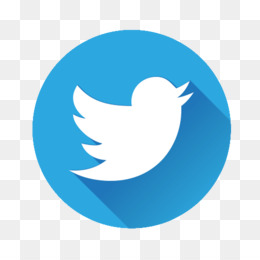

La dimensione del dataset estratto riportava 22021 osservazioni (righe) per 12 variabili (colonne).



# Neural Topic modeling con la metodologia BERTopic
I topic models, sono strumenti utili per scoprire
argomenti latenti nei documenti di testo.
Studi recenti hanno dimostrato la fattibilità dell'approccio alla modellazione degli argomenti con attività di Clustering. Rispetto ai modelli classici tra cui LDA, Non-Negative Matrix Factorization (NMF), [BERTopic](https://arxiv.org/abs/2203.05794) genera l'incorporamento di documenti (document-embedding) con modelli linguistici pre-addestrati, raggruppa gli embedding e
infine, genera rappresentazioni di argomenti (topic) con
la procedura [TF-IDF](https://towardsdatascience.com/tf-idf-simplified-aba19d5f5530) basata su classi.

**Importo le librerie**

In [ ]:
!pip install --upgrade joblib==1.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstalling joblib-1.2.0:
      Successfully uninstalled joblib-1.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.10.1 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


In [ ]:
pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 36.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 71.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.5/268.5 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df.columns

Index(['author_id', 'username', 'author_followers', 'author_tweets',
       'author_description', 'author_location', 'text', 'created_at',
       'Tweet_nonstop', 'Tweet_f'],
      dtype='object')

In [ ]:
df[['Tweet_nonstop','Tweet_f']]

,Tweet_nonstop,Tweet_f
0,"[riprendessi, temi, elementari, sicuramente, rileggerei, voluto, sposarmi, anni, piccola, ingenu...","[riprendessi, temi, elementari, sicuramente, rileggerei, voluto, sposarmi, anni, piccola, ingenu..."
1,"[, apertura, careerweek, dsa, mondo, lavoro, recruiting, vita, lavorativa, persone, dsa, h, aula...","[, apertura, careerweek, dsa, mondo, lavoro, recruiting, vita, lavorativa, persone, dsa, h, aula..."
2,"[università, scozzese, anni, master, preso, online, trasferimento, londra, tirocinio, legato, st...","[università, scozzese, anni, master, preso, online, trasferimento, londra, tirocinio, legato, st..."
3,"[, careerweek, stage, dispi, multiplayer, imprese, presentano, h, complesso, didattico, mattioli...","[, careerweek, stage, dispi, multiplayer, imprese, presentano, h, complesso, didattico, mattioli..."
4,"[career, week, università, siena, gt, ottobre, ore, adotta, skill, usienaalumni, porta, mondo, h...","[career, week, università, siena, gt, ottobre, ore, adotta, skill, usienaalumni, porta, mondo, h..."
...,...,...
22421,"[staplica, guarda, stata, insignita, università, straordinario, lavoro, svolta, sindacato, servo...","[staplica, guarda, stata, insignita, università, straordinario, lavoro, svolta, sindacato, servo..."
22422,"[holdmypsp, litigo, spesso, madre, pensa, studio, università, ecc, solo, trovare, lavoro, soddis...","[holdmypsp, litigo, spesso, madre, pensa, studio, università, ecc, solo, trovare, lavoro, soddis..."
22423,"[anno, entro, far, parte, mondo, grandi, maturità, patente, università, primo, lavoro, spera, u, t]","[anno, entro, far, parte, mondo, grandi, maturità, patente, università, primo, lavoro, spera, u, t]"
22426,"[twittaia, alessioparodi, finita, università, isee, comunque, padre, pensionato, dopo, quarantin...","[twittaia, alessioparodi, finita, università, isee, comunque, padre, pensionato, dopo, quarantin..."


In [ ]:
#Analisi sulla colonna "post", prendo i post maggiori di 10 words
data = df[df['Tweet_f'].str.len() > 10].reset_index()

**Vettorizzo le keywords ed elimino le stopwords**

In [ ]:
# we add this to remove stopwords
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stopword)

In [ ]:
data[['Tweet_nonstop','Tweet_f']]

,Tweet_nonstop,Tweet_f
0,"[riprendessi, temi, elementari, sicuramente, rileggerei, voluto, sposarmi, anni, piccola, ingenu...","[riprendessi, temi, elementari, sicuramente, rileggerei, voluto, sposarmi, anni, piccola, ingenu..."
1,"[, apertura, careerweek, dsa, mondo, lavoro, recruiting, vita, lavorativa, persone, dsa, h, aula...","[, apertura, careerweek, dsa, mondo, lavoro, recruiting, vita, lavorativa, persone, dsa, h, aula..."
2,"[università, scozzese, anni, master, preso, online, trasferimento, londra, tirocinio, legato, st...","[università, scozzese, anni, master, preso, online, trasferimento, londra, tirocinio, legato, st..."
3,"[, careerweek, stage, dispi, multiplayer, imprese, presentano, h, complesso, didattico, mattioli...","[, careerweek, stage, dispi, multiplayer, imprese, presentano, h, complesso, didattico, mattioli..."
4,"[career, week, università, siena, gt, ottobre, ore, adotta, skill, usienaalumni, porta, mondo, h...","[career, week, università, siena, gt, ottobre, ore, adotta, skill, usienaalumni, porta, mondo, h..."
...,...,...
15524,"[lavoratore, rifiuti, vaccinarsi, sarscov, rischia, alcun, licenziamento, intervento, professor,...","[lavoratore, rifiuti, vaccinarsi, sarscov, rischia, alcun, licenziamento, intervento, professor,..."
15525,"[es, sì, università, fine, filiera, deve, funzionare, bene, offrire, preparazione, base, italia,...","[e, sì, università, fine, filiera, deve, funzionare, bene, offrire, preparazione, base, italia, ..."
15526,"[staplica, guarda, stata, insignita, università, straordinario, lavoro, svolta, sindacato, servo...","[staplica, guarda, stata, insignita, università, straordinario, lavoro, svolta, sindacato, servo..."
15527,"[twittaia, alessioparodi, finita, università, isee, comunque, padre, pensionato, dopo, quarantin...","[twittaia, alessioparodi, finita, università, isee, comunque, padre, pensionato, dopo, quarantin..."


In [ ]:
data.dtypes

index                          int64
author_id                      int64
username                      object
author_followers               int64
author_tweets                  int64
author_description            object
author_location               object
text                          object
created_at            datetime64[ns]
Tweet_nonstop                 object
Tweet_f                       object
dtype: object

In [ ]:
data.head()

,index,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,Tweet_nonstop,Tweet_f
0,0,197441639,jismysunshine,1700,57914,Cosa direbbe una stella ⭐️ di notte alle giraffe 🦒?!,fan account,Se riprendessi i temi delle elementari sicuramente rileggerei che avrei voluto sposarmi a 23 ann...,2022-10-09 21:44:54,"[riprendessi, temi, elementari, sicuramente, rileggerei, voluto, sposarmi, anni, piccola, ingenu...","[riprendessi, temi, elementari, sicuramente, rileggerei, voluto, sposarmi, anni, piccola, ingenu..."
1,1,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"📌10/10. Apertura #CareerWeek\n""#DSA e mondo del lavoro. #Recruiting e vita lavorativa delle pers...",2022-10-09 21:29:20,"[, apertura, careerweek, dsa, mondo, lavoro, recruiting, vita, lavorativa, persone, dsa, h, aula...","[, apertura, careerweek, dsa, mondo, lavoro, recruiting, vita, lavorativa, persone, dsa, h, aula..."
2,2,1323393328658944000,anxioustype_,107,3262,tra ansia e mal di pancia ☁️ mi piacciono le serie tv e i bubble tea🧋ho lasciato il cuore a Lond...,"London, England","università scozzese a 19 anni, master preso online + trasferimento a londra, tirocinio legato ag...",2022-10-09 21:27:05,"[università, scozzese, anni, master, preso, online, trasferimento, londra, tirocinio, legato, st...","[università, scozzese, anni, master, preso, online, trasferimento, londra, tirocinio, legato, st..."
3,3,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"📌11/10. #CareerWeek: stage DISPI multiplayer - Le imprese si presentano.\nH. 9.30, Complesso did...",2022-10-09 21:24:15,"[, careerweek, stage, dispi, multiplayer, imprese, presentano, h, complesso, didattico, mattioli...","[, careerweek, stage, dispi, multiplayer, imprese, presentano, h, complesso, didattico, mattioli..."
4,4,435081321,unisiena,13351,35439,Università di Siena 1240.\nRettore prof. Francesco Frati.\nhttps://t.co/OoeibfvKcl\nhttps://t.co...,NaN,"Career Week #Università di #Siena (10-13/10).\n&gt; 11 ottobre ore 16.30:\n""Adotta 1 skill!"" @US...",2022-10-09 21:14:52,"[career, week, università, siena, gt, ottobre, ore, adotta, skill, usienaalumni, porta, mondo, h...","[career, week, università, siena, gt, ottobre, ore, adotta, skill, usienaalumni, porta, mondo, h..."


In [ ]:
data.columns

Index(['index', 'author_id', 'username', 'author_followers', 'author_tweets',
       'author_description', 'author_location', 'text', 'created_at',
       'Tweet_nonstop', 'Tweet_f'],
      dtype='object')

In [ ]:
data.shape

(15529, 11)

In [ ]:
data['Tweet_f']

0        [riprendessi, temi, elementari, sicuramente, rileggerei, voluto, sposarmi, anni, piccola, ingenu...
1        [, apertura, careerweek, dsa, mondo, lavoro, recruiting, vita, lavorativa, persone, dsa, h, aula...
2        [università, scozzese, anni, master, preso, online, trasferimento, londra, tirocinio, legato, st...
3        [, careerweek, stage, dispi, multiplayer, imprese, presentano, h, complesso, didattico, mattioli...
4        [career, week, università, siena, gt, ottobre, ore, adotta, skill, usienaalumni, porta, mondo, h...
                                                        ...                                                 
15524    [lavoratore, rifiuti, vaccinarsi, sarscov, rischia, alcun, licenziamento, intervento, professor,...
15525    [e, sì, università, fine, filiera, deve, funzionare, bene, offrire, preparazione, base, italia, ...
15526    [staplica, guarda, stata, insignita, università, straordinario, lavoro, svolta, sindacato, servo...
15527    [twittaia,

In [ ]:
data['Tweet_f'] = data['Tweet_f'].astype(str)

In [ ]:
# deal with df if needed
if type(data['Tweet_f']) is list:
    text = data['Tweet_f']
else:
    text = data['Tweet_f'].tolist()

model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(text)

Batches:   0%|          | 0/486 [00:00<?, ?it/s]

2023-07-05 12:23:51,975 - BERTopic - Transformed documents to Embeddings
2023-07-05 12:24:41,463 - BERTopic - Reduced dimensionality
2023-07-05 12:24:53,750 - BERTopic - Clustered reduced embeddings


In [ ]:
model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10070,-1_lavoro_universit_anni_fare,"[lavoro, universit, anni, fare, poi, solo, scuola, mondo, fatto, cosa]","[['finita', 'università', 'voglio', 'mettere', 'soldi', 'parte', 'anno', 'poi', 'continuare', 's..."
1,0,497,0_istruzione_lavoro_lezione_universit,"[istruzione, lavoro, lezione, universit, preparazione, fare, soddisfazione, anni, scuola, senza]","[['no', 'meno', 'utile', 'lavoro', 'serve', 'certificato', 'stato', 'attestare', 'preparazione',..."
2,1,290,1_comunque_fare_poi_quindi,"[comunque, fare, poi, quindi, lavoro, universit, essere, me, dopo, vuoi]","[['quest', 'anno', 'dovevo', 'fare', 'cose', 'diverse', 'fatta', 'letteralmente', 'mezza', 'os',..."
3,2,191,2_giorno_ogni giorno_primo giorno_ogni,"[giorno, ogni giorno, primo giorno, ogni, giorno lavoro, primo, oggi, lavoro, giorno dopo, dopo]","[['primo', 'giorno', 'lavoro', 'nessuno', 'rivolto', 'parola', 'nessuno', 'detto', 'cosa', 'dove..."
4,3,164,3_lavoro_universit_anni_tassare,"[lavoro, universit, anni, tassare, fatto, solo, famiglia, scuola, bella, meglio]","[['top', 'story', 'skytg', 'gioco', 'lavoro', 'bambino', 'intellettuale', 'eclettica', 'scienzia..."
...,...,...,...,...,...
120,119,10,119_comunicazione_federlazio_ingegneria architettura_scienze comunicazione,"[comunicazione, federlazio, ingegneria architettura, scienze comunicazione, quadro federlazio, a...","[['francaroncarolo', 'collega', 'miriam', 'lagona', 'maestro', 'comunicazione', 'pubblica', 'ita..."
121,120,10,120_borsa ricerca_borsa_comparativa titoli_titoli,"[borsa ricerca, borsa, comparativa titoli, titoli, fi universit, fi, titoli colloquio, comparati...","[['borsestudio', 'borsa', 'ricerca', 'ville', 'giardini', 'medicei', 'toscana', 'fi', 'universit..."
122,121,10,121_twitter_instagram_consigliamo asaperloita_asaperloita informazioni,"[twitter, instagram, consigliamo asaperloita, asaperloita informazioni, instagram tiktok, esteti...","[['apro', 'twitter', 'trovo', 'soliti', 'maiali', 'telegramoffeseanche', 'donne', 'ragazza', 'me..."
123,122,10,122_docenti universitari_docenti_cosa parla_costosa,"[docenti universitari, docenti, cosa parla, costosa, immagine, universitari, so, spiega, luiss, ...","[['ministra', 'maria', 'cristina', 'messa', 'spiega', 'inclusione', 'interno', 'università', 'te..."


In [ ]:
individual_topic = model.get_topic(2)

In [ ]:
individual_topic

[('giorno', 0.056964622198805465),
 ('ogni giorno', 0.019553967373718943),
 ('primo giorno', 0.015244981146703418),
 ('ogni', 0.014060947217295382),
 ('giorno lavoro', 0.014001179273236726),
 ('primo', 0.010130581178161928),
 ('oggi', 0.0075308790272459675),
 ('lavoro', 0.007331142342813781),
 ('giorno dopo', 0.007023074225417377),
 ('dopo', 0.006966806520269572)]

In [ ]:
freq = model.get_topic_info()
freq.head(15)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10508,-1_lavoro_universit_anni_fare,"[lavoro, universit, anni, fare, poi, solo, scuola, mondo, fatto, cosa]","[['motivi', 'stanca', 'avere', 'testa', 'libri', 'so', 'cosa', 'voglio', 'specializzarmi', 'so',..."
1,0,453,0_istruzione_lavoro_universit_lezione,"[istruzione, lavoro, universit, lezione, preparazione, anni, fare, soddisfazione, scuola, fa]","[['ameluzzi', 'dessere', 'cafone', 'va', 'denunciato', 'condannato', 'sede', 'civile', 'penale',..."
2,1,196,1_giorno_ogni giorno_primo giorno_giorno lavoro,"[giorno, ogni giorno, primo giorno, giorno lavoro, ogni, primo, oggi, lavoro, giorno dopo, giorn...","[['giusycuccaro', 'nnnoemiii', 'studentessa', 'eppure', 'lavoro', 'posso', 'applicare', 'smart',..."
3,2,140,2_enricoletta_pdnetwork_giovani_pdnetwork enricoletta,"[enricoletta, pdnetwork, giovani, pdnetwork enricoletta, dote, scuola, scuola universit, enni, e...","[['enricoletta', 'enricoletta', 'può', 'rispondere', 'tassare', 'dare', 'sussidi', 'enni', 'prof..."
4,3,133,3_career_job_day_career day,"[career, job, day, career day, careerday, recruiting, scopri, laureati, offerta lavoro, the]","[['jobopportunity', 'monday', 'job', 'alert', 'iniziamo', 'nuova', 'settimana', 'offerta', 'lavo..."
5,4,131,4_persona_fare_solo_lavoro,"[persona, fare, solo, lavoro, universit, essere, pu, poi, me, cosa]","[['libervir', 'fidanzata', 'statale', 'dico', 'enormi', 'differenze', 'persona', 'persona', 'luo..."
6,5,125,5_politiche_politica_ministero_governo,"[politiche, politica, ministero, governo, fascismo, fascista, politico, universit ricerca, lavor...","[['ministero', 'infrastrutture', 'trasporti', 'enrico', 'giovannini', 'tecnico', 'ministero', 'l..."
7,6,120,6_borsestudio_borsa ricerca_titoli_universit studi,"[borsestudio, borsa ricerca, titoli, universit studi, borsa, ricerca, studi, titoli colloquio, c...","[['borsestudio', 'borsa', 'ricerca', 'cantina', 'spazio', 'sacro', 'ca', 'università', 'studi', ..."
8,7,118,7_studio_cinema_studio universit_devo,"[studio, cinema, studio universit, devo, lavoro, tempo, lavoro studio, universit, quando, ristor...","[['risfiorire', 'studio', 'lavoro', 'tempo', 'libero', 'studio', 'notte', 'andare', 'università'..."
9,8,114,8_italiana_universit italiana_scuola italiana_mondo,"[italiana, universit italiana, scuola italiana, mondo, fa, mondo lavoro, lavoro, universit, ital...","[['annapaolasanna', 'riportato', 'notizia', 'xché', 'titolo', 'fa', 'vittime', 'uk', 'fa', 'vist..."


In [ ]:
freq.to_excel('topic_representation_05_07.xlsx')

In [ ]:
freq['Representation'].head(14)

0                                  [lavoro, universit, anni, fare, poi, solo, scuola, fatto, mondo, cosa]
1                      [istruzione, lavoro, lezione, universit, preparazione, fare, anni, scuola, me, fa]
2     [giorno, ogni giorno, primo giorno, giorno lavoro, ogni, primo, giorno dopo, oggi, lavoro giorno...
3                            [fare, sempre, cos, quindi, poi, comunque, lavoro, universit, essere, avere]
4     [enricoletta, pdnetwork, giovani, pdnetwork enricoletta, scuola, scuola universit, dote, enrico,...
5                                      [persona, fare, solo, lavoro, universit, essere, pu, me, cos, poi]
6     [italiana, universit italiana, scuola italiana, mondo, scuola, fa, italia, lavoro, mondo lavoro,...
7                          [solo, yolown, lavoro, fatto, universit, piccolo, dragonair, poi, dopo, stato]
8                    [vita, volta, fare, vita sociale, cosa, fare vita, anni, lavoro, diversa, universit]
9     [politica, politiche, governo, fascista,

In [ ]:
freq.head(14)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10452,-1_lavoro_universit_anni_fare,"[lavoro, universit, anni, fare, poi, solo, scuola, fatto, mondo, cosa]","[['pensa', 'bene', 'cosa', 'vuoi', 'fare', 'dopo', 'università', 'cercare', 'subito', 'lavoro', ..."
1,0,460,0_istruzione_lavoro_lezione_universit,"[istruzione, lavoro, lezione, universit, preparazione, fare, anni, scuola, me, fa]","[['dariobressanini', 'me', 'altri', 'me', 'conciliano', 'studio', 'lavoro', 'segue', 'lezione', ..."
2,1,187,1_giorno_ogni giorno_primo giorno_giorno lavoro,"[giorno, ogni giorno, primo giorno, giorno lavoro, ogni, primo, giorno dopo, oggi, lavoro giorno...","[['pezzadazienda', 'quando', 'visto', 'venezia', 'quando', 'entrata', 'prima', 'volta', 'bibliot..."
3,2,179,2_fare_sempre_cos_quindi,"[fare, sempre, cos, quindi, poi, comunque, lavoro, universit, essere, avere]","[['nyhbrv', 'conta', 'sempre', 'finisci', 'fare', 'lavoro', 'collega', 'scuola', 'scelto', 'comu..."
4,3,150,3_enricoletta_pdnetwork_giovani_pdnetwork enricoletta,"[enricoletta, pdnetwork, giovani, pdnetwork enricoletta, scuola, scuola universit, dote, enrico,...","[['enricoletta', 'enricoletta', 'può', 'rispondere', 'tassare', 'dare', 'sussidi', 'enni', 'prof..."
5,4,132,4_persona_fare_solo_lavoro,"[persona, fare, solo, lavoro, universit, essere, pu, me, cos, poi]","[['libervir', 'fidanzata', 'statale', 'dico', 'enormi', 'differenze', 'persona', 'persona', 'luo..."
6,5,131,5_italiana_universit italiana_scuola italiana_mondo,"[italiana, universit italiana, scuola italiana, mondo, scuola, fa, italia, lavoro, mondo lavoro,...","[['antonelloquart', 'riportato', 'notizia', 'xché', 'titolo', 'fa', 'vittime', 'uk', 'fa', 'vist..."
7,6,118,6_solo_yolown_lavoro_fatto,"[solo, yolown, lavoro, fatto, universit, piccolo, dragonair, poi, dopo, stato]","[['devistarecalmo', 'vediamo', 'elementari', 'solo', 'medie', 'solo', 'superiori', 'solo', 'univ..."
8,7,118,7_vita_volta_fare_vita sociale,"[vita, volta, fare, vita sociale, cosa, fare vita, anni, lavoro, diversa, universit]","[['prima', 'volta', 'dopo', 'vita', 'scuola', 'università', 'periodo', 'dovrebbe', 'provocarmi',..."
9,8,116,8_politica_politiche_governo_fascista,"[politica, politiche, governo, fascista, fascismo, politico, economia, universit ricerca, politi...","[['legasalvini', 'grazie', 'ministri', 'lega', 'economia', 'finanze', 'difesa', 'esteri', 'coop'..."


In [ ]:
df1= freq[['Topic','Count','Representation']]

In [ ]:
df1.to_excel('twitter_data.xlsx')

In [ ]:
model.visualize_barchart(top_n_topics = 15, n_words = 19)

In [ ]:
df_docs = model.get_document_info(text)

In [ ]:
df_docs.to_excel("docs_tweet.xlsx")

In [ ]:
df = pd.DataFrame(list(zip(topics, probs)), columns=['Topic', 'Probability'])

print(df)

       Topic  \
0         -1   
1         61   
2         -1   
3         61   
4         61   
...      ...   
15524     -1   
15525      0   
15526     29   
15527     -1   
15528     -1   

                                                                                               Probability  
0      [0.006562208585363102, 0.026741524100044885, 0.006687686623456253, 0.007707663630917787, 0.00514...  
1      [1.213802428300042e-307, 8.755521219182918e-308, 7.874671657538171e-308, 1.0078903161796506e-307...  
2      [0.008317800769780313, 0.005840701450633127, 0.004141119350746893, 0.006140350014940022, 0.00801...  
3      [1.2098666378220603e-307, 8.741827576136428e-308, 7.856899627366522e-308, 1.005307259087759e-307...  
4      [1.2122751807253837e-307, 8.748803851279922e-308, 7.868575384303138e-308, 1.0069845940500966e-30...  
...                                                                                                    ...  
15524  [0.0007555192599716954, 0.00067595268